In [17]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline   
plt.style.use('fivethirtyeight')

In [18]:
ageX=[25,26,27,28,29,30,31,32,33,34,35]  
devY=[38496,42000,46752,49320,53200,56000,62316,64928,67317,68748,73752]
pyDevY=[45372,48876,53850,57287,63016,65998,70003,70000,71496,75370,83640]
jsDevY=[37810,43515,46823,49293,53437,56373,62375,66674,68745,68746,74583]

In [19]:
xIndexes = np.arange(len(ageX))  #create numpy array: from 0 to len(ageX)
xIndexes   #distance between 2 bars is 1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

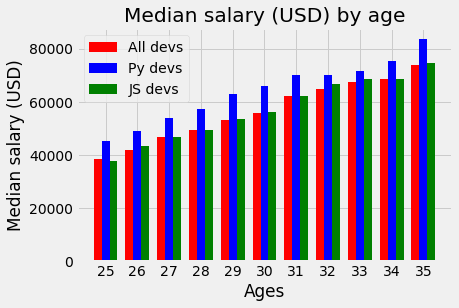

In [20]:
width=0.25
plt.xlabel('Ages')
plt.ylabel('Median salary (USD)')
plt.title('Median salary (USD) by age')
plt.xticks(ticks=xIndexes, labels=ageX)  # important!
plt.bar(xIndexes-width, devY, color='r', width=width, label='All devs')   #move the all_dev bar left
plt.bar(xIndexes, pyDevY, color='b', width=width, label='Py devs')   
plt.bar(xIndexes+width, jsDevY, color='g', width=width, label='JS devs')  #move the js_dev bar right
plt.legend()

## Tradition way to read csv

In [21]:
import csv
from collections import Counter

In [22]:
with open('dev.csv') as csvFile:
    csvReader = csv.DictReader(csvFile)  #read csv as dictionary
    languageCounter=Counter()  #create a counter to count languages, counter is a subclass of dictionary
    
    row = next(csvReader)  #use row to read line by line
    print(row['LanguagesWorkedWith'])      #print a specified column
    print(row['LanguagesWorkedWith'].split(';'))      #print a specified column, use split to save them in an array
    
    for rowFY in csvReader:   #for loop read every line
        languageCounter.update(rowFY['LanguagesWorkedWith'].split(';')) #add every line to the counter to count languages

HTML/CSS;Java;JavaScript;Python
['HTML/CSS', 'Java', 'JavaScript', 'Python']


In [23]:
print(languageCounter)  

Counter({'JavaScript': 59218, 'HTML/CSS': 55465, 'SQL': 47544, 'Python': 36442, 'Java': 35916, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


In [24]:
print(languageCounter.most_common(15))  

[('JavaScript', 59218), ('HTML/CSS', 55465), ('SQL', 47544), ('Python', 36442), ('Java', 35916), ('Bash/Shell/PowerShell', 31991), ('C#', 27097), ('PHP', 23030), ('C++', 20524), ('TypeScript', 18523), ('C', 18017), ('Other(s):', 7920), ('Ruby', 7331), ('Go', 7201), ('Assembly', 5833)]


In [25]:
languages= []
popularity = []
for item in languageCounter.most_common(15):
    languages.append(item[0])  #1st item in the dictionary(counter), eg: for ('JavaScript', 59218), it is 'JavaScript'
    popularity.append(item[1])  #2nd item in the dictionary(counter), eg: for ('JavaScript', 59218), it is 59218
print(languages)
print(popularity)

['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java', 'Bash/Shell/PowerShell', 'C#', 'PHP', 'C++', 'TypeScript', 'C', 'Other(s):', 'Ruby', 'Go', 'Assembly']
[59218, 55465, 47544, 36442, 35916, 31991, 27097, 23030, 20524, 18523, 18017, 7920, 7331, 7201, 5833]


Text(0.5, 1.0, 'Most popular languages')

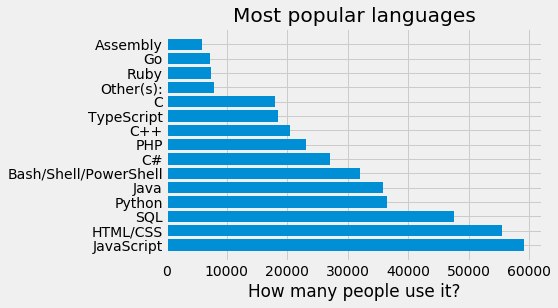

In [26]:
plt.barh(languages,popularity)  #'barh' puts languages in y-axis, popularity in x-axis
plt.xlabel('How many people use it?')
plt.title('Most popular languages')

Text(0.5, 1.0, 'Most popular languages')

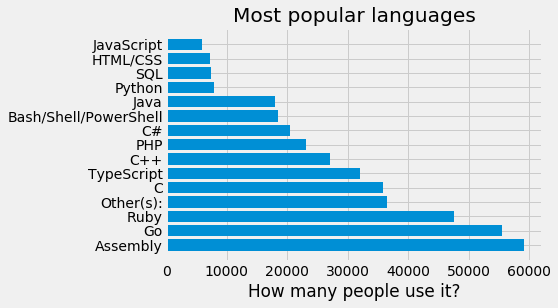

In [27]:
languages.reverse()
#popularity.reverse()
plt.barh(languages,popularity)  #'barh' puts languages in y-axis, popularity in x-axis
plt.xlabel('How many people use it?')
plt.title('Most popular languages')

## Use Pandas to read csv

In [28]:
import pandas as pd 
df = pd.read_csv('dev.csv')

In [29]:
ids = df['Responder_id']   #do not use 'id'!
lang = df['LanguagesWorkedWith']
languageCounter2 = Counter()

In [30]:
for l in lang:
    languageCounter2.update(l.split(';'))
print(languageCounter2)  

Counter({'JavaScript': 59219, 'HTML/CSS': 55466, 'SQL': 47544, 'Python': 36443, 'Java': 35917, 'Bash/Shell/PowerShell': 31991, 'C#': 27097, 'PHP': 23030, 'C++': 20524, 'TypeScript': 18523, 'C': 18017, 'Other(s):': 7920, 'Ruby': 7331, 'Go': 7201, 'Assembly': 5833, 'Swift': 5744, 'Kotlin': 5620, 'R': 5048, 'VBA': 4781, 'Objective-C': 4191, 'Scala': 3309, 'Rust': 2794, 'Dart': 1683, 'Elixir': 1260, 'Clojure': 1254, 'WebAssembly': 1015, 'F#': 973, 'Erlang': 777})


In [31]:
languages2=[]
popularity2=[]
for item in languageCounter2.most_common(15):
    languages2.append(item[0])
    popularity2.append(item[1])

Text(0.5, 1.0, 'Most popular languages')

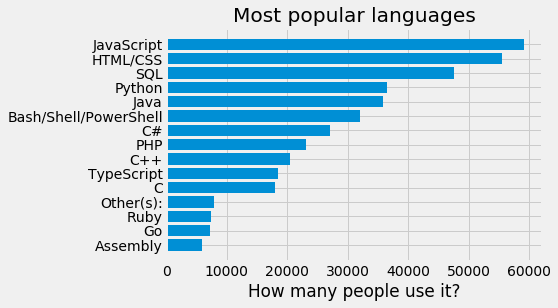

In [32]:
languages2.reverse()
popularity2.reverse()
plt.barh(languages2,popularity2)  #'barh' puts languages in y-axis, popularity in x-axis
plt.xlabel('How many people use it?')
plt.title('Most popular languages')